<img src="http://cliparts.co/cliparts/6iy/oBb/6iyoBbdpT.gif"/>

# EMPLOYEE ATTRITION
***

## Business Problem
***
*Bob's multi-million dollar company is about to go bankrupt and he wants to know why his employees are leaving.*

## Client
***
*Bob the Boss*

## Objective
***
*My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not and to understand if hybrid model works better than the classifiers*

# Part 1: Obtaining the Data 
***

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [27]:

df = pd.read_csv('HR_comma_sep.csv', index_col=None)

# Part 2: Scrubbing the Data 
***

In [28]:

df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [29]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [31]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data
*** 


##  3a. Statistical Overview 
***
The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61

In [32]:

df.shape

(14999, 10)

In [33]:

df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [34]:

turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [35]:

df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [36]:

turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##  3b. Correlation Matrix & Heatmap
***
**Moderate Positively Correlated Features:** 
- projectCount vs evaluation: 0.349333
- projectCount vs averageMonthlyHours:  0.417211
- averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**
 - satisfaction vs turnover:  -0.388375

**Stop and Think:**
- What features affect our target variable the most (turnover)?
- What features have strong correlations with each other?
- Can we do a more in depth examination of these features?

**Summary:**

From the heatmap, there is a **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

AttributeError: module 'seaborn' has no attribute 'plt'

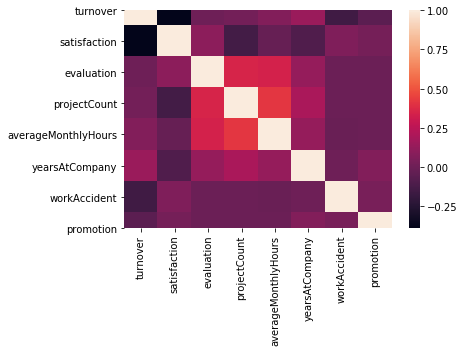

In [37]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

## 3b2. Statistical Test for Correlation
***

### One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

**Hypothesis Testing:** Is there significant difference in the **means of satisfaction level** between employees who had a turnover and the entire employee population?

 - **Null Hypothesis:** *(H0: pTS = pES)* The null hypothesis would be that there is **no** difference in satisfaction level between employees who did turnover and the entire employee population.

 - **Alternate Hypothesis:** *(HA: pTS != pES)* The alternative hypothesis would be that there **is** a difference in satisfaction level between employees who did turnover and the entire employee population.

In [38]:

emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


### Conducting the T-Test
***
Conducting a t-test at **95% confidence level** and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the **stats.ttest_1samp()** function:

In [39]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], 
                  popmean = emp_population_satisfaction) 

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

### T-Test Result
***
The test result shows the **test statistic "t" is equal to -39.109**. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies **outside** the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:

### T-Test Quantile
***
If the t-statistic value we calculated above **(-39.109)** is outside the quantiles, then we can reject the null hypothesis

In [40]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  

RQ = stats.t.ppf(0.975,degree_freedom) 

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


### One-Sample T-Test Summary
***
#### **T-Test = -39.109**       |        **P-Value = 9.01e-279**       |       **Reject Null Hypothesis**

**Reject the null hypothesis because:**
 - T-Test score is outside the quantiles
 - P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of **9.012e-279** at a 5% confidence level is a good indicator to **reject the null hypothesis**. 

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.



##  3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There is a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 - The evaluation and average monthly hour graphs both share a similar distribution. 
 - Employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 
**Stop and Think:** 
 - Is there a reason for the high spike in low satisfaction of employees?
 - Could employees be grouped in a way with these features?
 - Is there a correlation between evaluation and averageMonthlyHours?

Text(0, 0.5, 'Employee Count')

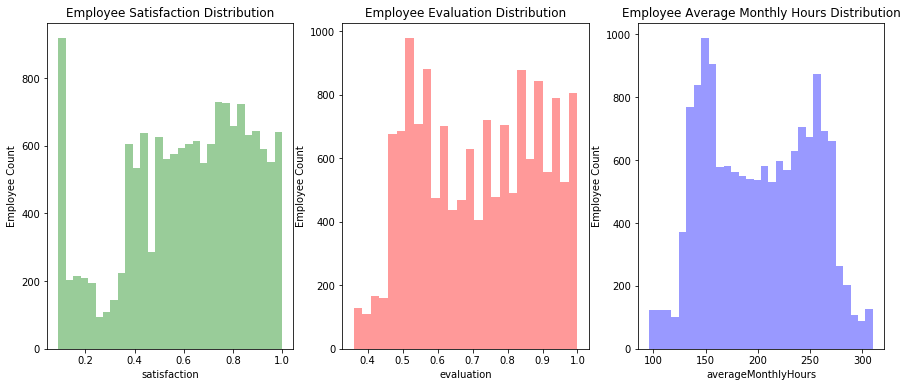

In [41]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

##  3d. Salary V.S. Turnover
***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 
**Stop and Think:** 
 - What is the work environment like for low, medium, and high salaries?
 - What made employees with high salaries to leave?

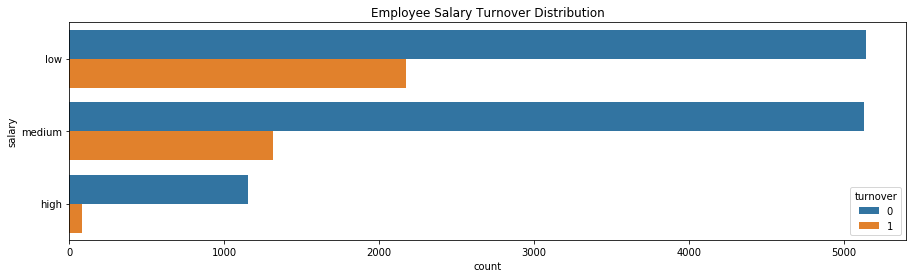

In [42]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

##  3e. Department V.S. Turnover 
***
**Summary:** Let's see more information about the departments. Here's what I found:
 - The **sales, technical, and support department** were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 
**Stop and Think:** 
 - If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

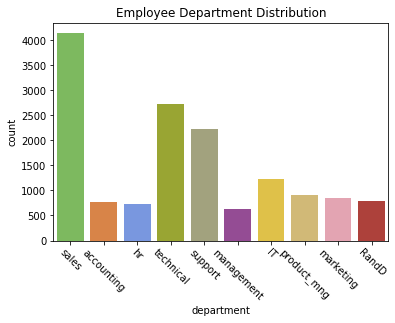

In [43]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

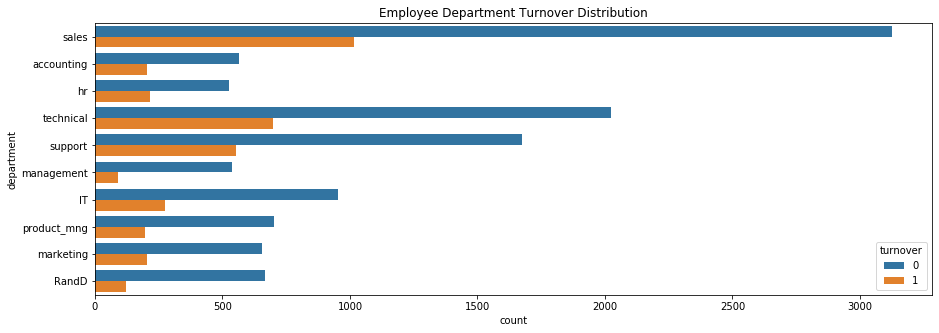

In [44]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

##  3f. Turnover V.S. ProjectCount 
***
**Summary:** This graph is quite interesting as well. Here's what I found:
 - More than half of the employees with **2,6, and 7** projects left the company
 - Majority of the employees who did not leave the company had **3,4, and 5** projects
 - All of the employees with **7** projects left the company
 - There is an increase in employee turnover rate as project count increases
 
**Stop and Think:** 
 - Why are employees leaving at the lower/higher spectrum of project counts?
 - Does this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
 - Do employees with 6+ projects are getting overworked, thus leaving the company?



[Text(0, 0.5, 'Percent')]

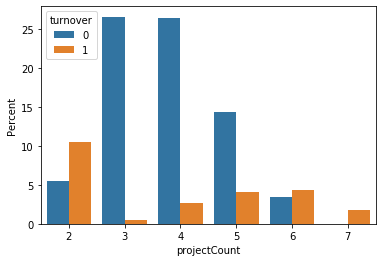

In [45]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  3g. Turnover V.S. Evaluation 
***
**Summary:** 
 - There is a biomodal distribution for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** for employees that stayed is within **0.6-0.8** evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

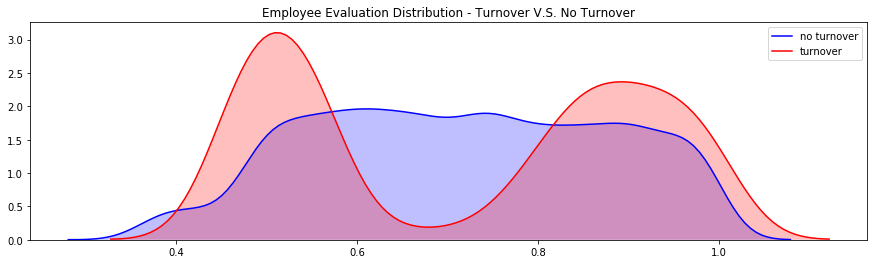

In [46]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

##  3h. Turnover V.S. AverageMonthlyHours 
***
**Summary:** 
 - Another bi-modal distribution for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

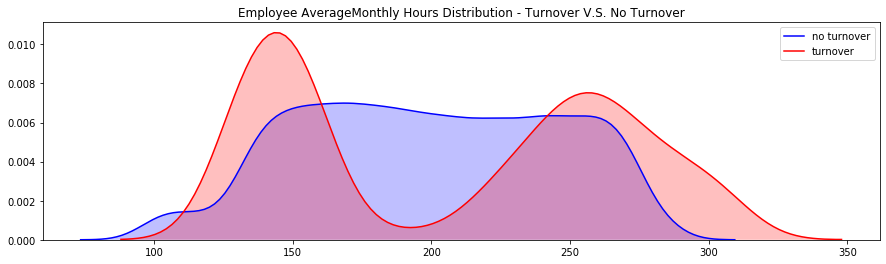

In [47]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

##  3i. Turnover V.S. Satisfaction 
***
**Summary:** 
 - There is a **tri-modal** distribution for employees that turnovered
 - Employees who had really low satisfaction levels **(0.2 or less)** left the company more
 - Employees who had low satisfaction levels **(0.3~0.5)** left the company more
 - Employees who had really high satisfaction levels **(0.7 or more)** left the company more

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

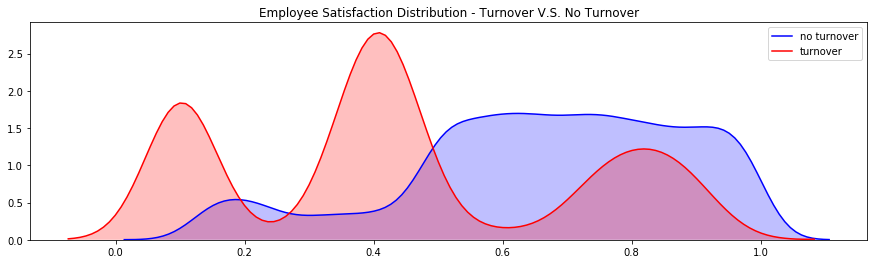

In [48]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

##  3j. ProjectCount VS AverageMonthlyHours 
***

**Summary:**
 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects

**Stop and Think:** 
 - What could be the meaning for this? 
 - **Why is it that employees who left worked more hours than employees who didn't, even with the same project count?**

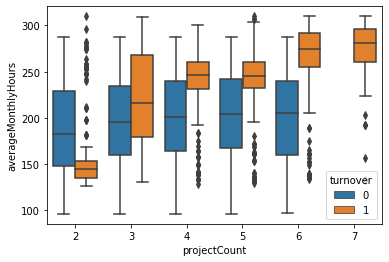

In [49]:
import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

##  3k. ProjectCount VS Evaluation
***
**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

**Questions to think about:**
 - **Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? **
 - Shouldn't employees with lower evaluations tend to leave the company more? 

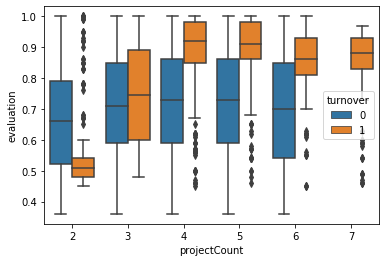

In [50]:

import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##  3l. Satisfaction VS Evaluation
***
**Summary:** This is by far the most compelling graph. This is what I found:
 - There are **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

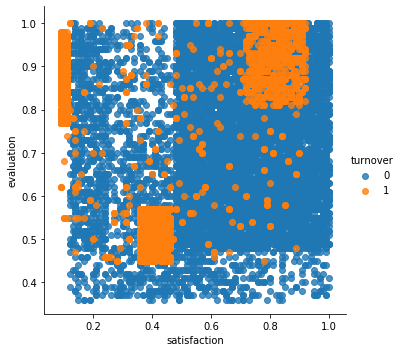

In [51]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, 
           hue='turnover')   

##  3m. Turnover V.S. YearsAtCompany 
***
**Summary:** Let's see if theres a point where employees start leaving the company. Here's what I found:
 - More than half of the employees with **4 and 5** years left the company
 - Employees with **5** years should **highly** be looked into 
 
**Stop and Think:** 
 - Why are employees leaving mostly at the **3-5** year range?
 - Who are these employees that left?
 - Are these employees part-time or contractors? 

[Text(0, 0.5, 'Percent')]

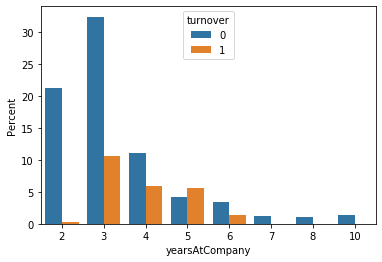

In [52]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## 3n. K-Means Clustering of Employee Turnover
***
**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

**Clustering PROBLEM:**
    - How do we know that there are "3" clusters?
    - We would need expert domain knowledge to classify the right amount of clusters
    - Hidden uknown structures could be present

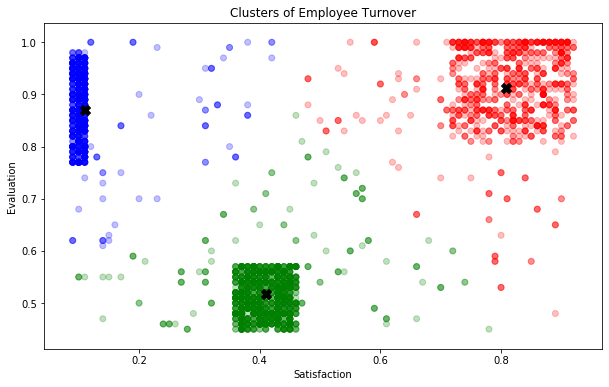

In [53]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# 4. Modeling the Data
***
 The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was **Random Forest**! 
 
 **Note: Base Rate** 
 ***
 - A **Base Rate Model** is a model that always selects the target variable's **majority class**. It's just used for reference to compare how better another model is against it. In this dataset, the majority class that will be predicted will be **0's**, which are employees who did not leave the company. 
 - If you recall back to **Part 3: Exploring the Data**, 24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's. 
 - **Example**: The base rate accuracy for this data set, when classifying everything as 0's, would be 76% because 76% of the dataset are labeled as 0's (employees not leaving the company).

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'department' and 'salary' features, since they are categorical 
department = pd.get_dummies(data=df['department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],drop_first=True,prefix='sal')
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [55]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [56]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [57]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [58]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.79


In [36]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.829 (0.011)


## Decision Tree 
***

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# gini index - CART(Classification and Refression Tree)
dtree = DecisionTreeClassifier(class_weight="balanced",
    min_weight_fraction_leaf=0.05)

dtree.fit(X_train,y_train) # Train the model



DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.05, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:

dtree.score(X_train,y_train) #Accuracy

print('\n Classification Report:\n\n',metrics.classification_report(y_test,dtree.predict(X_test))) 
print('Accuracy',metrics.accuracy_score(y_test,dtree.predict(X_test)))


 Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1714
           1       0.86      0.88      0.87       536

    accuracy                           0.94      2250
   macro avg       0.91      0.92      0.92      2250
weighted avg       0.94      0.94      0.94      2250

Accuracy 0.9382222222222222


## Random Forest
***

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=14)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
print('\n Classifaction Report : \n\n',metrics.classification_report(y_test,rf.predict(X_test)))
print('Accuracy :',metrics.accuracy_score(y_test,rf.predict(X_test)))



 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

Accuracy : 0.988


## Support Vector Machine
***

In [49]:
from sklearn.svm import LinearSVC
s = LinearSVC(class_weight='balanced',C = 10)

s.fit(X_train,y_train)


print('\n Classifaction Report : \n\n',metrics.classification_report(y_test,s.predict(X_test))) # Predictions
print('Accuracy :',metrics.accuracy_score(y_test,s.predict(X_test)))


 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.92      0.75      0.83      1714
           1       0.50      0.80      0.61       536

    accuracy                           0.76      2250
   macro avg       0.71      0.77      0.72      2250
weighted avg       0.82      0.76      0.78      2250

Accuracy : 0.7622222222222222


## Logistic Regression
***

In [50]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(class_weight='balanced',random_state=20,cv = 10,scoring='accuracy',Cs=100)

logreg.fit(X_train,y_train)
print('\n Classifaction Report : \n\n',metrics.classification_report(y_test,logreg.predict(X_test)))
print('Accuracy :',metrics.accuracy_score(y_test,logreg.predict(X_test)))


 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.92      0.76      0.83      1714
           1       0.51      0.79      0.62       536

    accuracy                           0.77      2250
   macro avg       0.71      0.77      0.73      2250
weighted avg       0.82      0.77      0.78      2250

Accuracy : 0.7693333333333333


## Stacked Hybrid Model
***

In [51]:
r = RandomForestClassifier()
r.fit(X_train, y_train)
logreg = LogisticRegressionCV()
logreg.fit(X_train,y_train)


sx = s.predict(np.matrix(X_train))
sl = logreg.predict(X_train)
sr = r.predict(X_train)
# val Predictions
stx = s.predict(np.matrix(X_test))
strr = r.predict(X_test)
stl = logreg.predict(X_test)
# Train
stack_train = pd.concat([pd.DataFrame(sx),pd.DataFrame(sr),pd.DataFrame(sl)],1)

# val
stack_test = pd.concat([pd.DataFrame(stx),pd.DataFrame(strr),pd.DataFrame(stl)],1)


stack_train.shape

stack = DecisionTreeClassifier(class_weight='balanced')

stack.fit(stack_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:

print('\n Classifaction Report : \n\n',metrics.classification_report(y_test,stack.predict(stack_test)))
print('\n Accuracy : ',metrics.accuracy_score(y_test,stack.predict(stack_test)))


 Classifaction Report : 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1714
           1       0.99      0.98      0.98       536

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


 Accuracy :  0.9924444444444445


## Comparision Table
***

In [61]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from yellowbrick.classifier import DiscriminationThreshold

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logreg,X_train,X_test,y_train,y_test,
                      "Logistic Regression")

decision_tree = DecisionTreeClassifier(
                                       class_weight="balanced",
    min_weight_fraction_leaf=0.05
                                      )
model2 = model_report(dtree,X_train,X_test,y_train,y_test,
                      "Decision Tree")


rfc = RandomForestClassifier(
                             
                             max_depth = 7,
                             criterion = "gini")
model3 = model_report(rf,X_train,X_test,y_train,y_test,
                      "Random Forest ")

model4 = model_report(s,X_train,X_test,y_train,y_test,
                      "SVM")
model5 = model_report(stack,stack_train,stack_test,y_train,y_test,
                      "Stacked Model")


#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)


In [62]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


# Feature Importance
***

**Top 3 Features:**
1. Satisfaction
2. YearsAtCompany
3. Evaluation


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(r,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Visualizing the Decision Tree Model



In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Employee Turnover") 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feat_names,  
                         class_names='turnover',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 5. Interpreting the Data
***

**Summary:** 
With all of this information, this is what Bob should know about his company and why his employees probably left:
 1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
 2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
 3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
 4. Employees with **low to medium salaries** are the bulk of employee turnover
 5. Employees that had **2,6, or 7 project count** was at risk of leaving the company
 6. Employee **satisfaction** is the highest indicator for employee turnover.
 7. Employee that had **4 and 5 yearsAtCompany** should be taken into consideration for high turnover rate
 8. Employee **satisfaction**, **yearsAtCompany**, and **evaluation** were the three biggest factors in determining turnover.

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**

In [115]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import pca

def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

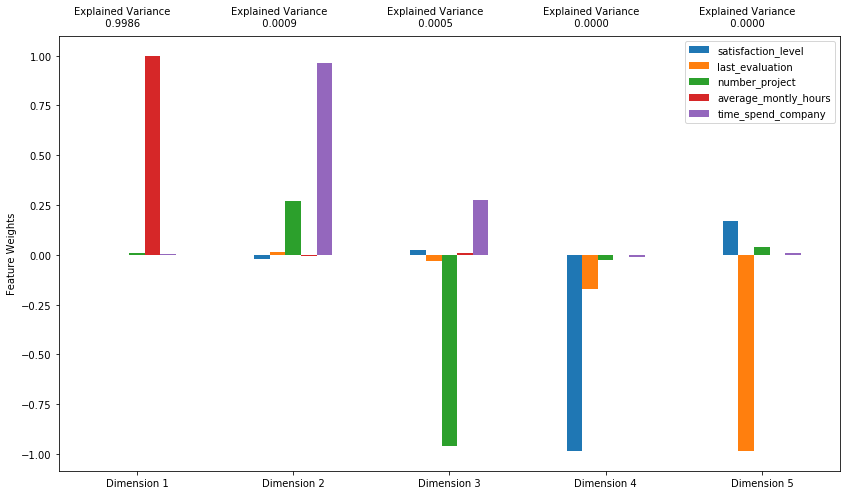

In [116]:
from sklearn.decomposition import PCA

pca_data = hr_data.ix[:,0:5]
pca = PCA(n_components=5)
pca = pca.fit(pca_data)

# Generate PCA results plot
pca_results = pca_results(pca_data, pca)

In [117]:
pd.DataFrame(data=[np.cumsum(pca.explained_variance_ratio_)], columns="Add " + 
             pca_results.index.values, index=['Combined Explained Variance'])

,Add Dimension 1,Add Dimension 2,Add Dimension 3,Add Dimension 4,Add Dimension 5
Combined Explained Variance,0.998623,0.999492,0.999966,0.999991,1.0


In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca = pca.fit(pca_data)

reduced_data = pca.transform(pca_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5'])

In [119]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_list = []
score_columns = []
preds = {}
centers = {}
sample_preds = {}

for n in range(5,1,-1):
    print ("Calculating clusters with {} dimensions.".format(n))
    clusterer = GaussianMixture(n_components=n)
    # Future
    #clusterer = mixture.GaussianMixture(n_components=n)
    clusterer.fit(reduced_data)

    preds[n] = clusterer.predict(reduced_data)
    centers[n] = clusterer.means_
    score = silhouette_score(reduced_data, preds[n], metric='euclidean')
    score_list.append(score)
    score_columns.append(str(n) + " components")

score_list = pd.DataFrame(data=[score_list],columns=score_columns, index=['Silhouette Score'])
score_list

Calculating clusters with 5 dimensions.
Calculating clusters with 4 dimensions.
Calculating clusters with 3 dimensions.
Calculating clusters with 2 dimensions.


,5 components,4 components,3 components,2 components
Silhouette Score,-0.165217,-0.107221,0.253374,0.108955


In [120]:

def cluster_results(reduced_data, preds, centers):
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (10,6))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Set plot title
    #plt.legend(loc='upper left', numpoints=1, ncol=4, fontsize=12, bbox_to_anchor=(0, 0))
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number",
                 fontsize = 14)

In [126]:
def cluster_results_3d(reduced_data, preds, centers):
    from mpl_toolkits.mplot3d import Axes3D
    
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    cmap = cm.get_cmap('gist_rainbow')
    
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax2 = fig.add_subplot(111, projection='3d')

    fig = fig.gca(projection='3d')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200,
                   zorder=1);
        ax2.scatter(c[0], c[1], c[2], marker='$%d$'%(i), alpha = 1, s=100,
                   zorder=1);
        
    for i, cluster in plot_data.groupby('Cluster'):   
        ax2.scatter(cluster['Dimension 1'], cluster['Dimension 2'], cluster['Dimension 3'],
                   c = cmap((i)*1.0/(len(centers)-1)), alpha=0.2,
                   label = 'Cluster %i'%(i), s=20,
                   zorder=.5)

    fig.set_xlabel('Dimension 1')
    fig.set_ylabel('Dimension 2')
    fig.set_zlabel('Dimension 3')
    plt.legend(loc='upper left', numpoints=1, ncol=4, fontsize=12, bbox_to_anchor=(0, 0))
    ax2.set_title("Cluster Learning on PCA-Reduced Data 3D Plot",
                 fontsize = 14);
    plt.show()

In [122]:

predictions = pd.DataFrame(preds[no_clusters], columns = ['Cluster'])
df['employee_cluster'] = predictions
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_low,sal_medium,employee_cluster
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,3
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [123]:

# Let's start the prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import model_selection
from time import time

# Let's keep 20 % of the data for testing purposes
test_size = .2
random_state = 42

X_all_clus = df.drop('turnover', 1)
y_all_clus = df['turnover']

# Use for testing later and don't touch: X_test_clus / y_test_clus
X_train_clus, X_test_clus, y_train_clus, y_test_clus = model_selection.train_test_split(
    X_all_clus, y_all_clus, test_size = test_size, random_state = random_state, stratify=y_all_clus)

clf_dict_clus = {}
clf_report_clus = []
clf_feature_relevance_clus = []

for clf_clus in [LinearSVC(random_state = random_state),
                LogisticRegression(random_state = random_state),
                DecisionTreeClassifier(random_state = random_state),
                SVC(random_state = random_state),
                RandomForestClassifier(random_state = random_state)]:
    # Extract name of estimator
    clf_name = clf_clus.__class__.__name__
    print ("Training", clf_name, "...")
    # Fit model on training data
    clf_dict_clus[clf_name] = clf_clus.fit(X_train_clus, y_train_clus)
    # Predict based on it
    # y_pred = clf.predict(X_train)
    
    # Perform cross validation
    start = time()
    scores = model_selection.cross_val_score(clf_clus, X_train_clus, y_train_clus, cv=5, scoring='roc_auc') 
    end = time()
    duration = end - start
    print ("Average CV performance for {}: {:.6} (in {:.6} seconds)".format(clf_name, scores.mean(), duration))
    clf_report_clus.append([clf_name, scores.mean(), duration])

    # Store feature relevance information 
    if clf_name in ["RandomForestClassifier", "DecisionTreeClassifier"]:
        clf_feature_relevance_clus.append(clf_clus.feature_importances_.tolist())
    elif clf_name == "LinearSVC":
        clf_feature_relevance_clus.append(clf_clus.coef_[0].tolist())
# Store information in list for better visibility

clf_report_clus = pd.DataFrame(clf_report_clus, columns=['classifier', 'mean_score', 'time'])

Training LinearSVC ...
Average CV performance for LinearSVC: 0.761408 (in 5.0849 seconds)
Training LogisticRegression ...
Average CV performance for LogisticRegression: 0.822427 (in 0.725109 seconds)
Training DecisionTreeClassifier ...
Average CV performance for DecisionTreeClassifier: 0.975479 (in 0.263937 seconds)
Training SVC ...
Average CV performance for SVC: 0.796779 (in 23.1032 seconds)
Training RandomForestClassifier ...
Average CV performance for RandomForestClassifier: 0.993482 (in 4.8138 seconds)


In [124]:
pd.DataFrame(clf_feature_relevance_clus, columns=X_train_clus.columns, index=['LinearSVC', 
                                                                              'DecisionTreeClassifier', 
                                                                              'RandomForestClassifier'])

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_low,sal_medium,employee_cluster
LinearSVC,-2.016006,-0.460551,-0.236813,0.006409,0.096398,-0.478289,-0.276173,-0.161920,0.081038,0.193001,-0.054469,0.123311,0.016786,0.084747,0.083375,0.085863,0.572845,0.388362,-0.194141
DecisionTreeClassifier,0.488247,0.093893,0.105120,0.058140,0.125124,0.001882,0.000279,0.000918,0.000995,0.000171,0.000432,0.001174,0.000026,0.002089,0.003555,0.004027,0.002534,0.002262,0.109133
RandomForestClassifier,0.262515,0.106530,0.173249,0.121002,0.160496,0.007973,0.001010,0.001604,0.001436,0.001533,0.001267,0.001038,0.000899,0.003130,0.002748,0.003456,0.006517,0.003134,0.140465


In [125]:
clf_report_clus = clf_report_clus.ix[:,0:3]
clf_report_clus.sort_values('mean_score', ascending=False)

,classifier,mean_score,time
4,RandomForestClassifier,0.993482,4.813800
2,DecisionTreeClassifier,0.975479,0.263937
1,LogisticRegression,0.822427,0.725109
3,SVC,0.796779,23.103237
0,LinearSVC,0.761408,5.084895
